# DIVE INTO CODE COURSE
## Python Introductory Class Assignment 3 The chestnut bun problem​ ​
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

## Problem 
There is a famous episode about 2 to the nth power [1] in which a tool called "Byvine" appears in Manga Doraemon.


*[1] Fujiko F. Fujio (1979) "Doraemon (17)" Shogakukan.*


"Byevine" is a medicine, and if you sprinkle it on it, the object will double every 5 minutes. I increase the number of chestnut buns in the process, but since I could not eat it, I used a rocket and threw it into space.


A frequent topic of discussion here is how chestnut buns will increase in the universe afterwards. There have been various discussions, but this time, let's simply calculate how the volume of chestnut buns increases.

## Defining the steps
## 1. The chestnut buns problem:
Before making a function for various situation, I will make some assumptions to the chestnut buns first (the volume of the buns, size of solar system and vice versa)

Assume the chestnut buns is similar to dorayaki pankace that Doraemon always love to eat. It has the shape kinda like a short circular cylinder.

Now let:
* the radius of dorayaki = 5 cm
* the thickness (height) of dorayaki = 3 cm (assume the pancake filled with much ingredients )

-> volume of circular cylinder = $\pi \times r^2 \times h$ = $\pi \times 5^2 \times 3$ ~ 235,62 $cm^3$

Now because the dorayaki is not 100% shaped as circular cylinder, I will cut it down into 200 $cm^3$, which equal 2 $\times$ 10e-5 $m^3$

Move on to the solar system stuff, assumming our solar system does not take Pluto into account and Neptune will be the last planet.

Distance from Sun to Neptune, which is also the radius of solar system approximately equal 4.5 billion kilometers (according to NASA [2])


Assumming the solar system orbit as a sphere (I do not know if my assumption is too unrealistic, but I choose it as a sphere so it can match the unit with dorayaki's volume)

The volume of solar system = 4/3 $\times$  $\pi$ $\times$ $r^3$. And since the number is too big to be written, I will keep it as a formula

*[2] solarsystem.nasa.gov/news/1164/how-big-is-the-solar-system*

## 2. Creating function

In [3]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def byvine_increase(object_size, area_size):
    """
    A function that calculate number of days in order for for an area to be filled with bunch of objects that injected the Byvine         medicine - an magical tool that can double the number of object every 5 minutes

    Parameteres:
    --------------
    object_size: float
        Size/volume of an object
    
    students: int
        Size/volume of an area

    Returns:
    --------------
    day: int
        Number of days for the area to be filled with object's duplicates
    """

    # Calculate number of days
    # With the grow rate of doubled every 5 minute, describe the general solution as below:
        # 5 min -> object_size*2 = 20
        # 10 min -> object_size*2^2 = 40
        # 15 min -> object_size*2^3 = 120
        # 20 min -> object_size*2^4 = 240
        # ........................
        # n min - >  object_size*2^n/5 = area_size (or object_size*2^n/5 > area_size)
        # therefore, n = 5*log2(area_size/object_size)


    minute_growth = 5*math.log2(area_size/object_size) # formula

    return minute_growth

NOTE: In order for the function to run properly, all variables need to converted to the same units.

In [61]:
# Declare chestnut bun size
chestnut_bun_size = 2 * 10e-8 # I covnerted from m^3 to km^3

solar_radius = 4.5 * 10e8 # km
solar_system_size = 4/3 * math.pi * solar_radius**3

In [6]:
solar_system_size

3.817035074111598e+29

In [62]:
minute_filling = byvine_increase(chestnut_bun_size, solar_system_size)
print("Time for solar system to be filled with chestnut buns: {} [hours]".format(minute_filling/60))

Time for solar system to be filled with chestnut buns: 10.043488654937368 [hours]


### Other version of calculating the time for this problem using iteration (and can use list for plotting purpose)

In [48]:
def byvine_increase_loop(object_size, area_size):
    """
    A function (for loop) that calculate number of days in order for for an area to be filled with bunch of objects that injected the     Byvine medicine - an magical tool that can double the number of object every 5 minutes

    Parameteres:
    --------------
    object_size: float
        Size/volume of an object
    
    students: int
        Size/volume of an area

    Returns:
    --------------
    day: int
        Number of days for the area to be filled with object's duplicates
    size_each_time: list
        A list contain the sizes of object increased (doubled) every 5 minute

    """
    time = 0
    size_each_time = []
    size_each_time.append(object_size)

    while object_size < area_size:

        time+=5 # Minute
        object_size*=2
        scaled_object_size = object_size
        size_each_time.append(scaled_object_size)

        if (object_size >= area_size):
            break


    return time, size_each_time

Time for solar system to be filled with chestnut buns: 10.083333333333334 [hours]


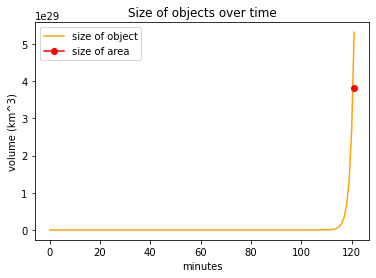

In [49]:
# Declare chestnut bun size
chestnut_bun_size = 2 * 10e-8 # I covnerted from m^3 to km^3

solar_radius = 4.5 * 10e8 # km
solar_system_size = 4/3 * math.pi * solar_radius**3

time_filling, size_growth = byvine_increase_loop(chestnut_bun_size, solar_system_size)

print("Time for solar system to be filled with chestnut buns: {} [hours]".format(time_filling/60)) # convert to hour format

plt.title("Size of objects over time")
plt.xlabel("minutes")
plt.ylabel("volume (km^3)")
plt.plot(size_growth, label="size of object", color="orange")
plt.plot(len(size_growth) - 1, solar_system_size, label="size of area", color="red", marker='o')
plt.legend()
plt.show()


In conclusion, it turns out that my functions work pretty well in calculating the size of object over time. The value of time in both functions are not the same, but its approximately equal to each other and it satisfies the requirements.

## 3. Considering other situations

3.1. Create plotting function

In [72]:
def byvine_plot(object_name, size_growth, area_size, color):
    plt.title("Size of {} over time".format(object_name))
    plt.xlabel("minutes")
    plt.ylabel("volume (10e29 km^3)")
    plt.plot(size_growth, label="size of object", color=color[0])
    plt.plot(len(size_growth) - 1, area_size, label="size of area", color=color[1], marker='o')
    plt.legend()
    plt.show()

3.2. We will check how long will it take for the Cocacola can fill the Great Pyramid of Giza.

In [59]:
# When declaring varible, I've found out that declare it without the decimal mark will let the number to be more precise
coke_can_size = 38 * 10e-6 # m^3
pyramid_size = 23 * 10e4 # m^3

Time for Pyramid of Giza to be filled with Coke cans: 2.75 [hours]


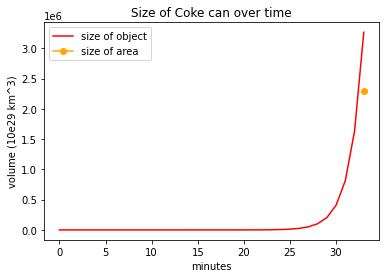

In [74]:
coca_time_filling, coca_size_growth = byvine_increase_loop(coke_can_size, pyramid_size)

print("Time for Pyramid of Giza to be filled with Coke cans: {} [hours]".format(coca_time_filling/60)) # convert to hour format

color = ["red", "orange"] # first color is for the object, second color is for the area
byvine_plot("Coke can", coca_size_growth, pyramid_size, color)

3.3. We will check how long will it for the Nissan Match car Cocacola can fill the Sun

In [82]:
car_size = 8.5 # m^3
sun_size = 141 * 10e22 # m^3

Time for Pyramid of Giza to be filled with Coke cans: 6.75 [hours]


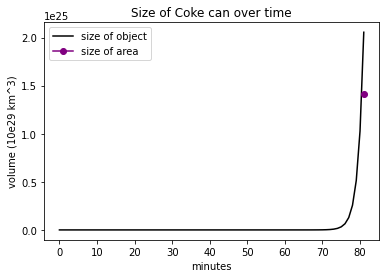

In [83]:
car_time_filling, car_size_growth = byvine_increase_loop(car_size, sun_size)

print("Time for Pyramid of Giza to be filled with Coke cans: {} [hours]".format(car_time_filling/60)) # convert to hour format

color = ["black", "purple"] # first color is for the object, second color is for the area
byvine_plot("Coke can", car_size_growth, sun_size, color)